# 회귀모델 유형 실습

### 라이브러리 선언

In [1]:
import pandas as pd
import numpy as np

# 모델 라이브러리 선언
from sklearn import tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


targetUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/cars.csv"
# CSV 파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv(targetUrl)

### (1) 타입통합 / 특성 숫자컬럼 추가

In [3]:
featuresData.columns

Index(['age', 'gender', 'miles', 'debt', 'income', 'sales'], dtype='object')

In [4]:
# 데이터 타입 통합
featuresData = featuresData.astype({"age":int,
                                    "gender":int,
                                    "miles":int,
                                    "debt":int,
                                    "income":int,
                                    "sales":int})

In [5]:
featuresData.dtypes

age       int32
gender    int32
miles     int32
debt      int32
income    int32
sales     int32
dtype: object

### 특성숫자변환: np.where 방식

In [7]:
# # 특성 숫자컬럼 추가
# featuresData["HO_YN"] = np.where(featuresData.HOLIDAY == "Y", 1,0)
# featuresData["PRO_YN"] = np.where(featuresData.PROMOTION == "Y", 1,0)
# featuresData.head()

### 특성숫자변환: label 인코더 방식

In [8]:
# from sklearn.preprocessing import LabelEncoder
# # 인코딩 수행
# le_ho = LabelEncoder() 
# le_pro = LabelEncoder()
# featuresData["HO_YN"] = \
#             le_ho.fit_transform(featuresData.HOLIDAY)
# featuresData["PRO_YN"] = \
#             le_pro.fit_transform(featuresData.PROMOTION)

# # 다시 인코딩된 내용을 디코딩 후 기존값과 비교
# featuresData["HO_DECO"] = \
#             le_ho.inverse_transform(featuresData.HO_YN)
# featuresData["PRO_DECO"] = \
#             le_pro.inverse_transform(featuresData.PRO_YN)

In [9]:
# featuresData.drop(columns=["HO_DECO","PRO_DECO"],inplace=True)

### 특성숫자변환: 딕셔너리 활용

In [10]:
# binarymap = {"Y":1, "N":0}

# featuresData["HO_YN"] = featuresData.HOLIDAY.map(binarymap)
# featuresData["PRO_YN"] = featuresData.PROMOTION.map(binarymap)
# featuresData.head(2)

### 특성숫자변환: get dummies

In [11]:
# featuresData.columns

In [16]:
# featuresData = pd.concat( [ featuresData,
#              pd.get_dummies(prefix="PROMO_DU",\
#                           data = featuresData.PROMOTION)],
#           axis=1   )

# featuresData.columns

# len(featuresData)

# featuresData.head()

# featuresData.drop(columns=["PROMO_DU_Y","PROMO_DU_N"], inplace=True)

# featuresData.columns

### (2) 특성선정 / 데이터 분리

In [17]:
corrDf = featuresData.corr(method="pearson")
corrDf

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [15]:
# 상관관계 확인
corrdf = featuresData.corr()
corrdf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [18]:
# 상관관계 계수 비율 선정
featuresStd = 0.5 

# 특성 추출
features = list( corrDf.loc[ ( abs( corrDf.sales ) > featuresStd ) & 
                       ( abs( corrDf.sales ) != 1) ].index )
print(features)

# 정답지 추출
label = ['sales'] 
print(label)

['miles', 'debt', 'income']
['sales']


In [28]:
# 데이터 분리

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
trainingData_features,\
testData_features,\
trainingData_label,\
testData_label=\
train_test_split(featuresData.loc[:,features],
                 featuresData.loc[:,label],
                 test_size=0.2, random_state=15)

In [31]:
print(trainingData_features.shape)
print(trainingData_label.shape)
print(testData_features.shape)
print(testData_label.shape)

(770, 3)
(770, 1)
(193, 3)
(193, 1)


In [33]:
trainingData_features

,miles,debt,income
883,27,1147,11548
13,14,1543,1376
867,27,3619,2319
424,18,9007,1222
546,29,1413,2875
...,...,...,...
887,13,1626,10614
645,38,56551,10986
908,14,829,3703
757,29,8725,5797


In [32]:
# # 데이터 분리
# yearweekStd = 201630

# # 훈련 데이터
# trainingData_features = \
#     featuresData.loc[featuresData.YEARWEEK <= yearweekStd][features]
# trainingData_label = \
#     featuresData.loc[featuresData.YEARWEEK <= yearweekStd][label]
# # 테스트 데이터
# testData_features = \
#     featuresData.loc[featuresData.YEARWEEK > yearweekStd][features]
# testData_label = \
#     featuresData.loc[featuresData.YEARWEEK > yearweekStd]
# print(trainingData_features.shape)
# print(trainingData_label.shape)
# print(testData_features.shape)
# print(testData_label.shape)

### (3) 모델 적용

In [34]:
from sklearn import linear_model

In [35]:
from sklearn import ensemble

In [36]:
# 모델 정의
model_method_dt = \
    tree.DecisionTreeRegressor(random_state=1)
model_method_lr = \
    linear_model.LinearRegression()
model_method_rf = \
    ensemble.RandomForestRegressor(random_state=1)

# 머신 러닝 (훈련데이터 특성/답지)
model_dt = model_method_dt.fit(X=trainingData_features, 
                         y=trainingData_label)
model_lr = model_method_lr.fit(X=trainingData_features, 
                         y=trainingData_label)
model_rf = model_method_rf.fit(X=trainingData_features, 
                         y=trainingData_label)

C:\Users\kopo\AppData\Local\Temp/ipykernel_18740/3196128387.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_method_rf.fit(X=trainingData_features,


In [37]:
model_lr.intercept_

array([-1272.17415656])

In [38]:
model_lr.coef_

array([[124.32384633,   0.28181486,   0.88772849]])

In [39]:
from sklearn.tree import export_graphviz
import graphviz

In [40]:
# 아래와 동일
# dot_data = export_graphviz(decision_tree=modelCoeff,
#                            rounded=True)
# graph = graphviz.Source(dot_data, format="png")
# graph

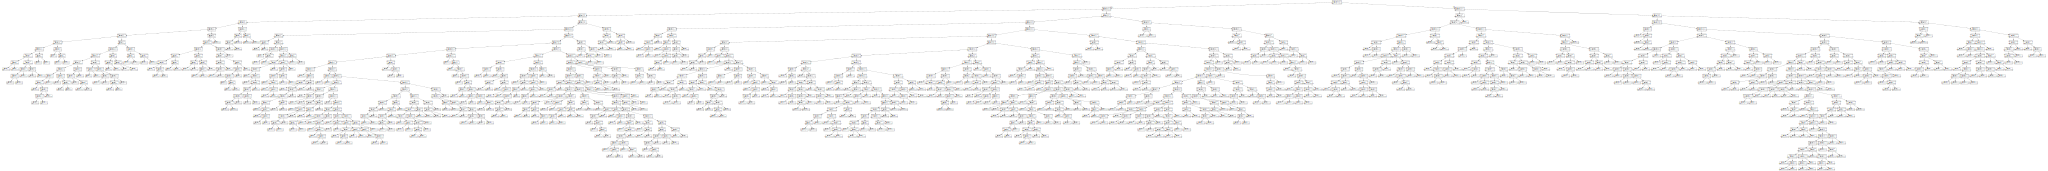

In [41]:
export_graphviz(decision_tree=model_dt,
               out_file="tree.dot",
               impurity=False)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

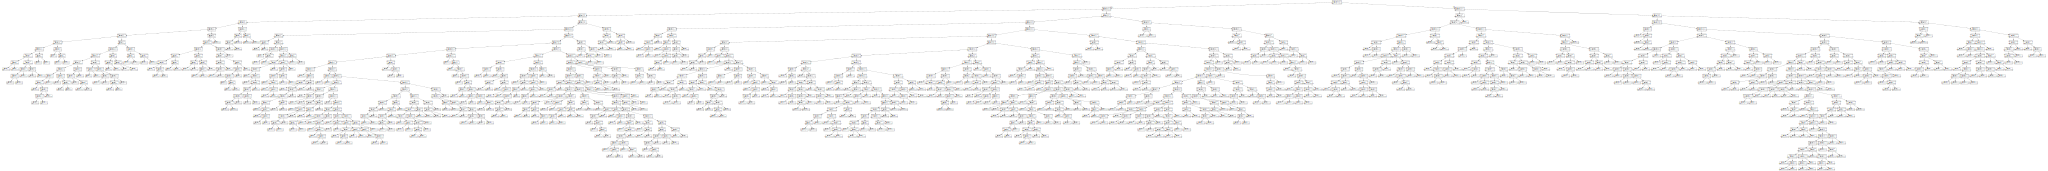

In [42]:
export_graphviz(decision_tree=model_rf.estimators_[0],
               out_file="tree.dot",
               impurity=False)

with open("tree.dot") as f:
    dot_graph_praph = f.read()
display(graphviz.Source(dot_graph))

### (4) 예측

In [43]:
predict_dt = model_dt.predict( X = testData_features)
predict_dt

array([ 9834.,  6536.,  1295.,  2429., 29191., 26912.,  3982.,  3069.,
       23970., 25258., 23927.,  2626.,  1285., 16021., 15056.,  5385.,
        1236., 15823.,  5256.,  1909.,  5222.,  3779.,  3485.,  3852.,
       16558.,  1285., 27800., 15056., 15104.,  7483., 27213.,  1792.,
       10481.,  4241., 29209., 22441., 18243.,  3978., 14328.,  4086.,
        5277.,  1213., 28119.,  4746., 22441.,  3199., 20942.,  4072.,
        3382.,  1211.,  8113., 15823.,  3454., 27906.,  4182., 27213.,
        3635.,  2248., 25689.,  1285., 13132.,  3168.,  3137., 10866.,
       21211.,  1767.,  8843., 17766., 23527.,  7189., 13996.,  3692.,
         650., 18192., 13291., 22965.,  5837.,  4635., 20101.,  9041.,
        2540., 21881., 17300.,  1447.,  6892.,  4487.,  5931.,  1393.,
        7427., 11685.,  3268.,  7518.,  2856., 22441.,  4271., 18064.,
        2429., 21621., 28822., 17304.,  9378.,  8485., 16653.,   841.,
       24791.,  3487.,  4455., 13790.,  8396.,  1789.,  1147., 20428.,
      

In [44]:
predict_lr = model_lr.predict( X = testData_features)
predict_lr

array([[ 4356.77548722],
       [ 3323.51402282],
       [ 1835.92200181],
       [ 3080.53497997],
       [27207.59496695],
       [24296.91141909],
       [ 6989.28749488],
       [ 4877.79851268],
       [24523.70293176],
       [24330.53226116],
       [27491.23399729],
       [ 8316.24169523],
       [ 9470.20828103],
       [ 7008.57350188],
       [11652.02134737],
       [ 5539.58835825],
       [ 1462.95046281],
       [ 9724.16198064],
       [ 5264.18899204],
       [ 1677.32032547],
       [ 6931.25244679],
       [10378.06641792],
       [ 4101.37299365],
       [ 8108.04314681],
       [ 9733.29635718],
       [ 8754.42916354],
       [35783.10206745],
       [11295.6320747 ],
       [12617.72537558],
       [ 9018.49603298],
       [10962.01104768],
       [ 3766.8151864 ],
       [11757.52177126],
       [ 6830.16581822],
       [29071.84036949],
       [22583.46455331],
       [17531.19400963],
       [ 8139.70145242],
       [10263.8798193 ],
       [ 3795.10844167],


In [45]:
predict_rf = model_rf.predict( X = testData_features)
predict_rf

array([ 5062.55      ,  4528.24      ,  1205.38666667,  2906.9       ,
       28692.91      , 26004.07      ,  5764.48      ,  4134.48      ,
       25486.05      , 26204.3       , 24995.97      ,  4474.27      ,
        8274.28      , 10918.01      , 14797.44      ,  3732.75      ,
        1237.65533333,  9828.88      ,  4944.86      ,  1665.77      ,
        5460.71      ,  6915.87      ,  3637.77      ,  6895.98      ,
       12909.09      ,  6327.89      , 28765.17      , 12409.95      ,
       14857.        ,  9651.86      , 18966.76      ,  1848.96      ,
       10816.07      ,  4231.2       , 28591.93      , 25056.76      ,
       19083.96      ,  4809.5       , 11791.49      ,  3377.38      ,
        5079.86      ,  1348.08      , 25990.36      ,  3294.04      ,
       25576.99      ,  3900.07      , 21205.27      ,  4210.99      ,
        4787.53      ,  7308.58      ,  8761.12      ,  9426.07      ,
        4047.68      , 28333.1       ,  5990.52      , 13202.96      ,
      

#  5. 데이터 정리

In [46]:
import warnings

In [47]:
warnings.filterwarnings(action="ignore")

In [48]:
testData_label["PREDICT_DT"] = predict_dt
testData_label["PREDICT_LR"] = predict_lr
testData_label["PREDICT_RF"] = predict_rf

In [49]:
testData_label.head(5)

,sales,PREDICT_DT,PREDICT_LR,PREDICT_RF
42,2869,9834.0,4356.775487,5062.550000
481,2701,6536.0,3323.514023,4528.240000
91,1432,1295.0,1835.922002,1205.386667
486,1642,2429.0,3080.534980,2906.900000
806,27515,29191.0,27207.594967,28692.910000


In [51]:
# MAE 지표
pMae_DT = mean_absolute_error(y_true = testData_label['sales'], 
                           y_pred = testData_label['PREDICT_DT'])  

pMae_LR = mean_absolute_error(y_true = testData_label['sales'], 
                           y_pred = testData_label['PREDICT_LR'])  
pMae_RF = mean_absolute_error(y_true = testData_label['sales'], 
                           y_pred = testData_label['PREDICT_RF'])  

In [52]:
print("DT: {} LR: {} RF: {}".format(pMae_DT, pMae_LR, pMae_RF))

DT: 3471.834196891192 LR: 3087.0789262503 RF: 2666.781944732297


In [53]:
pMae_DT

3471.834196891192

In [54]:
pMae_LR

3087.0789262503

In [55]:
pMae_RF

2666.781944732297